<h1 align="center"><font size="5">Final Project: Mô hình dự đoán bệnh suy tim sung huyết</font></h1>

<h2>Mục lục</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Thông tin</a></li>
    <li><a href="https://#Section_2">Giới thiệu về dự liệu</a></li>
    <li><a href="https://#Section_3">Nhập dữ liệu </a></li>
    <li><a href="https://#Section_4">Xử lý dữ liệu</a> </li>
    <li><a href="https://#Section_5">Chuẩn hóa dữ liệu </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Logistic Regression, SVM, KNN, Naive Bayes, Random Forest, XGBoost and Classification models and return their appropriate accuracy scores</a></li>
</a></li>
</div>

# Thông tin

Model này dùng dữ liệu của các bệnh nhân suy tim sung huyết.

<font color=yellow>Mục đích</font>: Giúp các bác sỹ lâm sàng có cơ sở đánh giá rủi ro mới nhất cho từng bệnh nhân và giảm khả năng tái nhập viện trong vòng 30 ngày sau khi xuất viện.

Sử dụng một số thuật toán được dạy trong khóa học, cụ thể:

1.  Logistics Regression
2.  SVM
3.  KNN
4.  Naive Bayes
5.  Random Forest
6.  XGBoost

Sử dụng các chỉ số sau để đánh gía model:

1.  Accuracy Score
2.  Precision
3.  Recall
4.  Jaccard Index
5.  F1-Score
6.  LogLoss

Cuối cùng, sẽ sử dụng các mô hình của mình để tạo báo cáo ở phần cuối.

# Giới thiệu về dữ liệu

Nguồn dữ liệu là của Viện Khoa học Thông tin và Công nghệ (Institute of Computer Science and Technology) của trường Đại học California, Irvine: https://archive.ics.uci.edu/dataset/45/heart+disease

Tập dữ liệu **heart_disease_uci.csv** bao gồm các cột sau:

| Field         | Description                                            |  Type   |
| ------------- | ------------------------------------------------------ | ------- |
| id            | patient identification number                          |  int64  |
| age           | age in years                                           |  int64  |
| sex           | sex (1 = male; 0 = female)                             |  object |
| cp            | chest pain type                                        |  object |
| trestbps      | resting blood pressure (in mm Hg on admission to the hospital)| float64 |
| chol          | serum cholestoral in mg/dl                             |  float64|
| fbs           | (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false) |  object |
| restecg       | resting electrocardiographic results                   |  object |
| thalch       | maximum heart rate achieved                             |  float64|
| exang         | exercise induced angina (1 = yes; 0 = no)              |  object |
| oldpeak       | ST depression induced by exercise relative to rest     |  float64|
| slope         | the slope of the peak exercise ST segment              |  object |
| ca            | number of major vessels (0-3) colored by flourosopy    |  float64|
| thal          |  [normal; fixed defect; reversible defect]             |  object |
| num           | diagnosis of heart disease (angiographic disease status) (0->4)  |  int64  |

### Import thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, log_loss, confusion_matrix
import sklearn.metrics as metrics
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV

## Nhập dữ liệu

In [2]:
path='D:/IT/Machine Learning/Data/heart_disease_uci.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Data Exploration

In [4]:
df.shape

(920, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


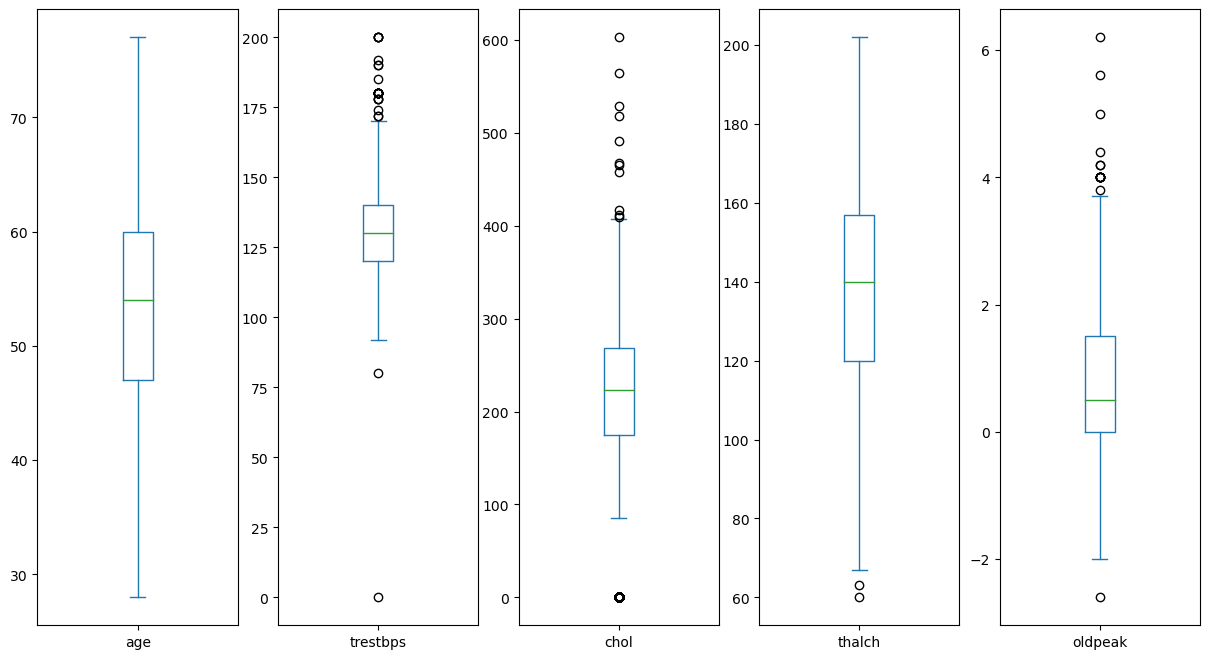

In [7]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 5, 1)
ax1 = fig.add_subplot(1, 5, 2)
ax2 = fig.add_subplot(1, 5, 3)
ax3 = fig.add_subplot(1, 5, 4)
ax4 = fig.add_subplot(1, 5, 5)

df['age'].plot(kind='box', figsize=(15, 8), ax=ax0)

df['trestbps'].plot(kind='box',figsize=(15, 8), ax=ax1)

df['chol'].plot(kind='box',figsize=(15, 8), ax=ax2)

df['thalch'].plot(kind='box',figsize=(15, 8), ax=ax3)

df['oldpeak'].plot(kind='box',figsize=(15, 8), ax=ax4)

plt.show()

In [8]:
df.num.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [9]:
df['num'] = df['num'].replace([1, 2, 3, 4], 1)

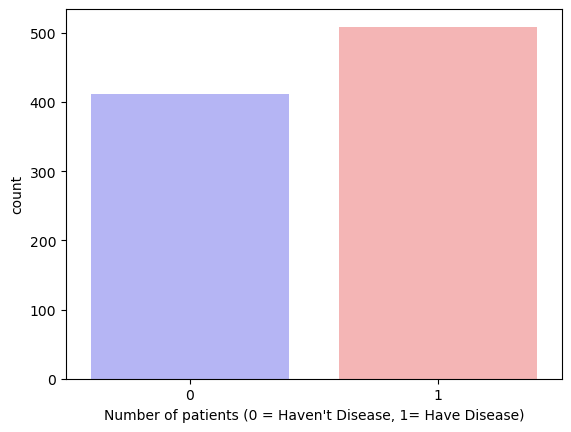

In [10]:
sns.countplot(x="num", data=df, palette="bwr")
plt.xlabel("Number of patients (0 = Haven't Disease, 1= Have Disease)")
plt.show()

In [11]:
countNoDisease = len(df[df.num == 0])
countHaveDisease = len(df[df.num == 1])
print("Tỷ lệ bệnh nhân không mắc bệnh tim: {:.2f}%".format((countNoDisease / (len(df.num))*100)))
print("Tỷ lệ bệnh nhân mắc bệnh tim: {:.2f}%".format((countHaveDisease / (len(df.num))*100)))

Tỷ lệ bệnh nhân không mắc bệnh tim: 44.67%
Tỷ lệ bệnh nhân mắc bệnh tim: 55.33%


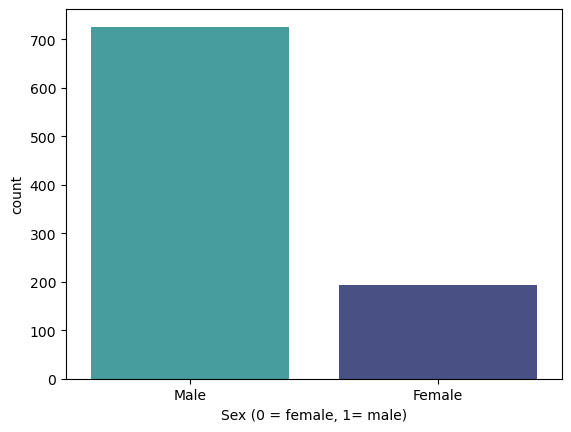

In [12]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [13]:
countFemale = len(df[df.sex == 'Female'])
countMale = len(df[df.sex == 'Male'])
print("Tỷ lệ nữ: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Tỷ lệ nam: {:.2f}%".format((countMale / (len(df.sex))*100)))

Tỷ lệ nữ: 21.09%
Tỷ lệ nam: 78.91%


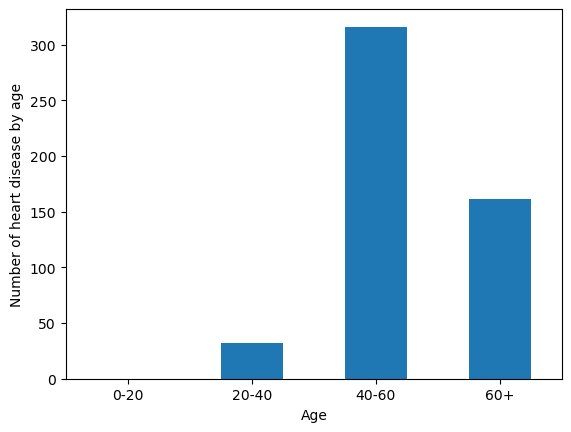

In [14]:
bin_ages = [0, 20, 40, 60, df['age'].max()]
labels = ['0-20', '20-40', '40-60', '60+']
df['age_bins'] = pd.cut(df['age'], bins=bin_ages, labels=labels)

dia_age =  df[df['num'] == 1].groupby('age_bins')['num'].count()

dia_age.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Number of heart disease by age')
plt.xticks(rotation=0)
plt.show()

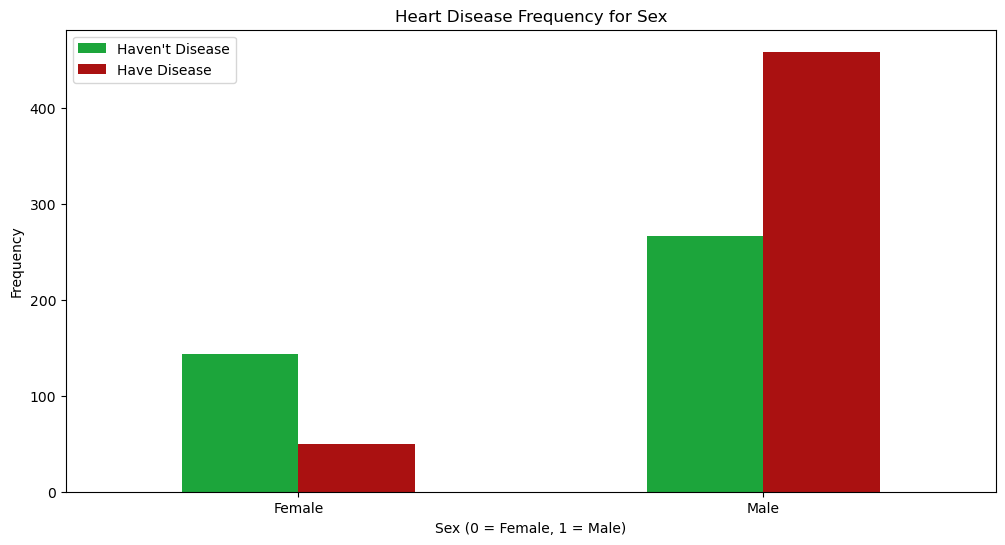

In [15]:
pd.crosstab(df.sex, df.num).plot(kind="bar",figsize=(12,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

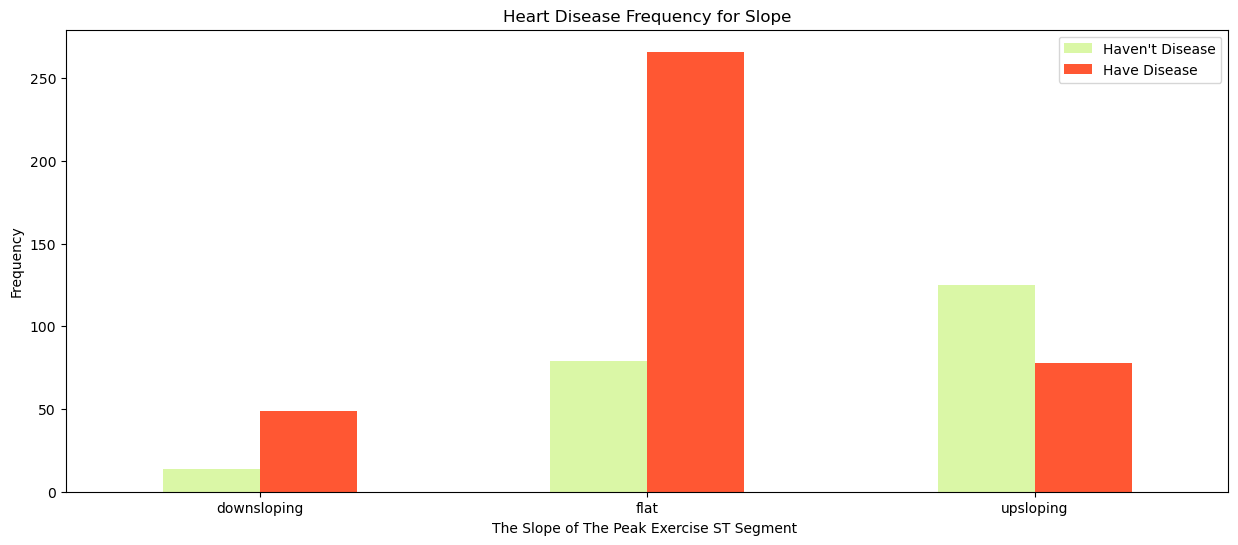

In [16]:
pd.crosstab(df.slope,df.num).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

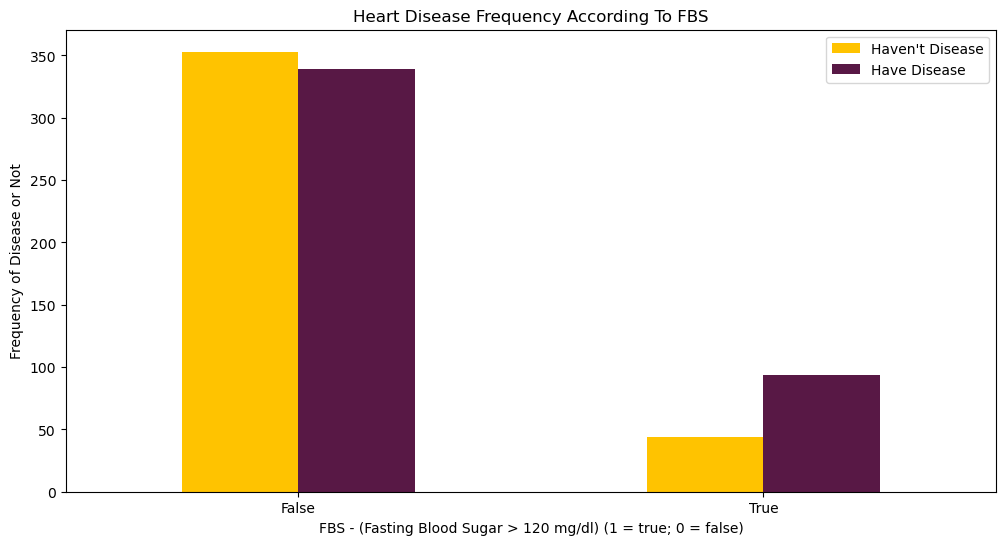

In [17]:
pd.crosstab(df.fbs,df.num).plot(kind="bar",figsize=(12,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

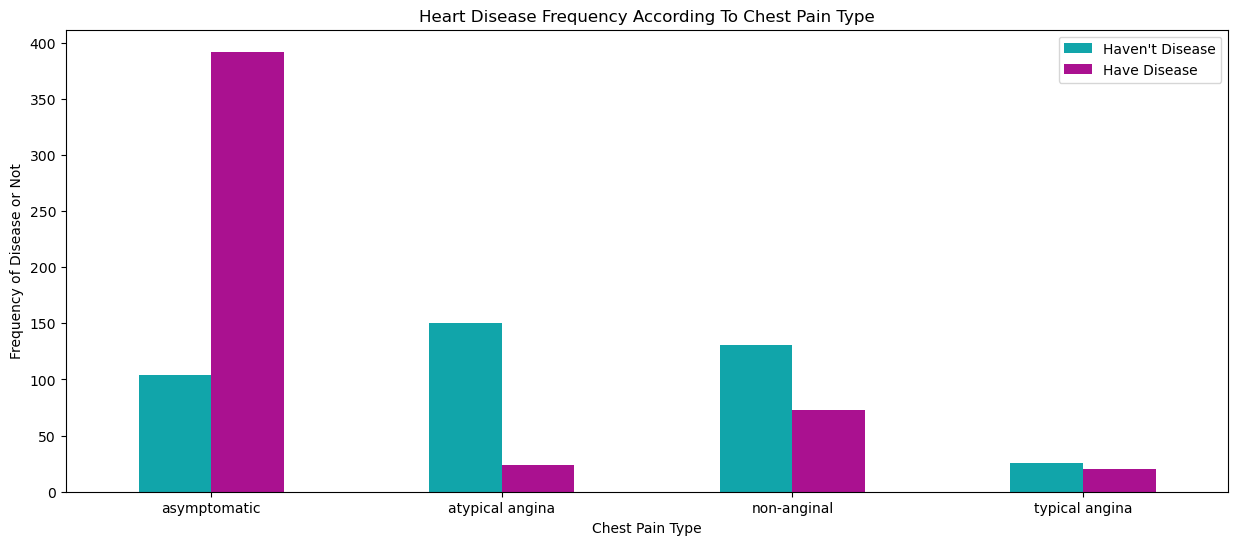

In [18]:
pd.crosstab(df.cp,df.num).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

### Training Data and Test Data

In [19]:
# Chia train/test theo tỷ lệ 80:20.
df_train, df_test = train_test_split(df, test_size=0.2, stratify = df['num'], random_state=42)
X_train = df_train.drop(columns= ['id', 'dataset', 'age_bins'], axis=1).copy()
y_train = X_train.pop("num")

X_test = df_test.drop(columns= ['id', 'dataset', 'age_bins'], axis=1).copy()
y_test = X_test.pop("num")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(736, 13) (736,)
(184, 13) (184,)


### Xử lý dữ liệu

In [20]:
# Kiểm tra số lượng dữ liệu null/NA
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
age_bins      0
dtype: int64

In [21]:
cat_cols = list(X_train.select_dtypes('object').columns)
num_cols = list(X_train.select_dtypes(['float', 'int']).columns)

In [22]:
cat_pl= Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), # Xử lý missing data bằng cách thay thế most frequent
        ('onehot', OneHotEncoder()), # Biến đổi giá trị của biến phân loại thành véc tơ OneHot
    ]
)

In [23]:
num_pl = Pipeline(
    steps=[
           ('imputer', KNNImputer(n_neighbors=7)), # Xử lý missing data bằng cách dự báo KNN với n=5.
           ('scaler', MinMaxScaler()) # Xử lý missing data bằng MinMax scaler
    ]
)

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pl, num_cols), # áp dụng pipeline cho biến liên tục
        ('cat', cat_pl, cat_cols), # áp dụng pipeline cho biến phân loại
    ]
)

### Train Logistic Regression, SVM, KNN, Naive Bayes, Random Forest, XGBoost and return their appropriate accuracy scores

In [25]:
from sklearn.base import BaseEstimator
class ClassifierSwitcher(BaseEstimator):
  def __init__(
      self, 
      estimator = RandomForestClassifier(),
  ):
      """
      A Custom BaseEstimator that can switch between classifiers.
      :param estimator: sklearn object - The classifier
      """ 
      
      self.estimator = estimator


  def fit(self, X, y=None, **kwargs):
      self.estimator.fit(X, y)
      return self


  def predict(self, X, y=None):
      return self.estimator.predict(X)


  def predict_proba(self, X):
      return self.estimator.predict_proba(X)


  def score(self, X, y):
      return self.estimator.score(X, y)

In [26]:
pipeline = Pipeline(
    steps=[("pre", preprocessor), ("clf", ClassifierSwitcher())]
)

In [27]:
parameters = [
    {
        'clf__estimator': [LogisticRegression()], 
        'clf__estimator__penalty': ('l2', 'elasticnet', 'l1'),
        'clf__estimator__max_iter': [50, 80],
        'clf__estimator__tol': [1e-4]
    },
    {
        'clf__estimator': [svm.SVC()], 
        'clf__estimator__C': [0.1, 1, 10, 100],
        'clf__estimator__kernel': ['linear', 'rbf'],
        'clf__estimator__gamma': [0.1, 1, 10]
    },
    {
        'clf__estimator': [KNeighborsClassifier()],
        'clf__estimator__n_neighbors': [3, 5, 7, 9],
        'clf__estimator__weights': ['uniform', 'distance'],
        'clf__estimator__algorithm': ['brute', 'kd_tree'],
        'clf__estimator__p': [1, 2]
    },
    {
        'clf__estimator': [BernoulliNB()],
        'clf__estimator__alpha': [0.1, 0.5, 1.0, 2.0],
        'clf__estimator__fit_prior': [True, False]
    },
    {
        'clf__estimator': [RandomForestClassifier()],
        'clf__estimator__max_features': ['auto', 'sqrt', 'log2'],
        'clf__estimator__n_estimators': [50, 100],
        'clf__estimator__max_depth': [5, 10],
        'clf__estimator__criterion': ('gini', 'entropy')
    },
    {
        'clf__estimator': [XGBClassifier()],
        'clf__estimator__n_estimators': [10, 50, 100, 500, 750, 1000, 2000, 5000],
        'clf__estimator__max_depth': [3, 5, 7, 10, 15],
        'clf__estimator__subsample': [0.3, 0.5, 0.7, 1],
        'clf__estimator__colsample_bytree': [0.5, 0.7, 0.9, 1],
        'clf__estimator__learning_rate': [0.3, 0.1, 0.01, 0.001]
    }
        
]

In [28]:
grid_search = GridSearchCV(pipeline, param_grid=parameters, n_jobs=1)
grid_search  

GridSearchCV(estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=7)),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'thalch',
                                                                          'oldpeak',
                                                                          'ca']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['sex',
                                                                          'cp',
                                                                          'fbs',
                                                                          'restecg',...
                                                           monotone_constraints=None,
                                                           n_estimators=100,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           predictor=None,
                                                           random_state=None, ...)],
                          'clf__estimator__colsample_bytree': [0.5, 0.7, 0.9,
                                                               1],
                          'clf__estimator__learning_rate': [0.3, 0.1, 0.01,
                                                            0.001],
                          'clf__estimator__max_depth': [3, 5, 7, 10, 15],
                          'clf__estimator__n_estimators': [10, 50, 100, 500,
                                                           750, 1000, 2000,
                                                           5000],
                          'clf__estimator__subsample': [0.3, 0.5, 0.7, 1]}])

In [29]:
grid_search.fit(X_train, y_train)

d:\Program Files\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been depre

GridSearchCV(estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=7)),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'thalch',
                                                                          'oldpeak',
                                                                          'ca']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['sex',
                                                                          'cp',
                                                                          'fbs',
                                                                          'restecg',...
                                                           monotone_constraints=None,
                                                           n_estimators=100,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           predictor=None,
                                                           random_state=None, ...)],
                          'clf__estimator__colsample_bytree': [0.5, 0.7, 0.9,
                                                               1],
                          'clf__estimator__learning_rate': [0.3, 0.1, 0.01,
                                                            0.001],
                          'clf__estimator__max_depth': [3, 5, 7, 10, 15],
                          'clf__estimator__n_estimators': [10, 50, 100, 500,
                                                           750, 1000, 2000,
                                                           5000],
                          'clf__estimator__subsample': [0.3, 0.5, 0.7, 1]}])

In [30]:
model = grid_search.best_estimator_
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak', 'ca']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('clf',
                 ClassifierSwitcher(estimator=RandomForestClassifier(criterion='entropy',
                                                                     max_depth=5)))])

In [31]:
grid_search.best_params_

{'clf__estimator': RandomForestClassifier(criterion='entropy', max_depth=5),
 'clf__estimator__criterion': 'entropy',
 'clf__estimator__max_depth': 5,
 'clf__estimator__max_features': 'sqrt',
 'clf__estimator__n_estimators': 100}

In [32]:
grid_search.best_score_

0.8355580069865784

In [33]:
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak', 'ca']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('clf',
                 ClassifierSwitcher(estimator=RandomForestClassifier(criterion='entropy',
                                                                     max_depth=5)))])

In [34]:
predictions = model.predict(X_test)

In [35]:
model_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
model_Precision = metrics.precision_score(y_test, predictions)
model_Recall = metrics.recall_score(y_test, predictions)
model_JaccardIndex = metrics.jaccard_score(y_test, predictions)
model_F1_Score = metrics.f1_score(y_test, predictions)
model_Log_Loss = metrics.log_loss(y_test, predictions)

In [36]:
Report = pd.DataFrame({'Algorithm' : ['XGBoost']})

Report['Accuracy'] = [model_Accuracy_Score]
Report['Precision'] = [model_Precision]
Report['Recall'] = [model_Recall]
Report['Jaccard'] = [model_JaccardIndex]
Report['F1-score'] = [model_F1_Score]
Report['LogLoss'] = [ model_Log_Loss]

Report

,Algorithm,Accuracy,Precision,Recall,Jaccard,F1-score,LogLoss
0,XGBoost,0.847826,0.842593,0.892157,0.764706,0.866667,5.484904


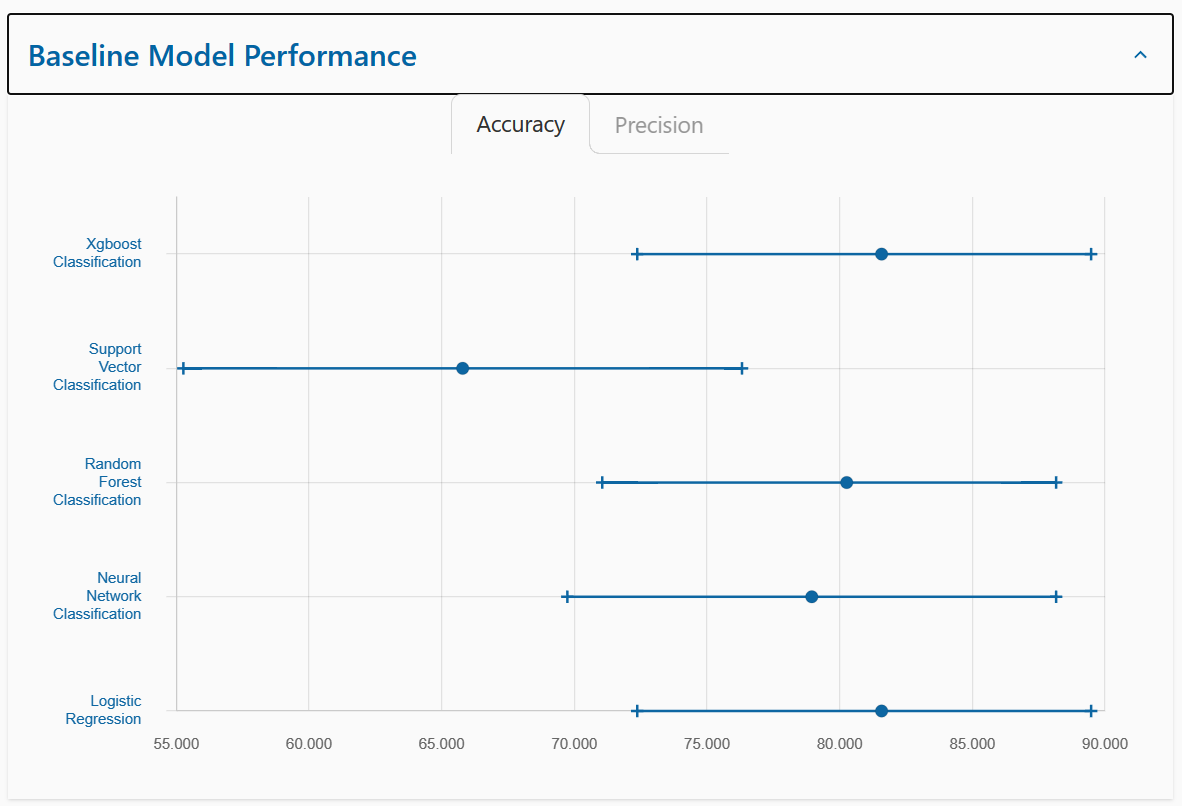

Độ chính xác của các mô hình trên https://archive.ics.uci.edu/dataset/45/heart+disease

<h2>Authors:</h2> 

Hoàng Dũng